## KNN vs. OLS

I have data on the fertitily and medical history of 100 men. I want to use the medical history I have to try and predict whether or not each man has abnormal fertility. 

The data has 10 variables. Our outcome __Diagnosis__ which tells if a subject has normal or altered fertility. 

There are the 3 binary categorical variables telling if a subject has had serious physical __Trauma__, any __Childhood_Disease__, or __Surgery__. There are 4 other categorical variables that describe what __Season__ the test was administered in, if the subject has had any __Recent_fever__ and if so how recent, the subject's __Alcohol_use__, and the subject's __Smoking__ habits. The final 2 variables are continuous and decribe the subject's __Age__ and how many __Hours_sitting__ the subject spends per day.

All the non-binary variables has been transformed so that they are between -1 and 1. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import codecs
import random
from collections import Counter
from IPython.core.display import HTML
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import urllib.request

%matplotlib inline

## Importing the Data


In [2]:
data = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt").read()
data_str = str(data)

In [3]:
#print(data_str)

In [4]:
data_str = data_str[2:(len(data_str)-1)]

In [5]:
#print(data_str)

In [6]:
data_list = data_str.split('\\r\\n')

In [7]:
#display(data_list)

In [8]:
del data_list[len(data_list)-1]

In [9]:
data_series = pd.Series(data_list)
#display(data_series)

In [10]:
fertility = data_series.str.split(',',n=10,expand=True)
fertility.columns = ['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever',
                    'Alcohol_use','Smoking','Hours_sitting','Diagnosis']

In [11]:
display(fertility.head())

,Season,Age,Childhood_disease,Trama,Surgery,Recent_fever,Alcohol_use,Smoking,Hours_sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.5,1,0,0,0,1,-1,0.5,N
3,-0.33,0.75,0,1,1,0,1,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.5,O


In [12]:
# Can the outcome varibale to numeric
fertility['DiagNum'] = fertility['Diagnosis'].apply({'N':0,'O':1}.get)

In [13]:
fertility.shape

(100, 11)

In [14]:
features = fertility[['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever',
                      'Alcohol_use','Smoking','Hours_sitting','DiagNum']]
#make sure features are floats
features = features.astype('float64')

Now that the data is prepped I'm ready to begin modeling. Since both types of models I will be using are regression-based, I need to make sure all of my features correlate with my outcome variable. I will make 2 correlation maps to get a good look at both the negative a positive correlation of my features.

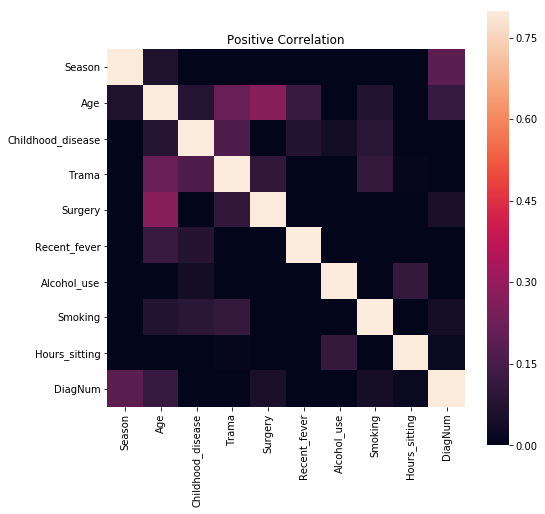

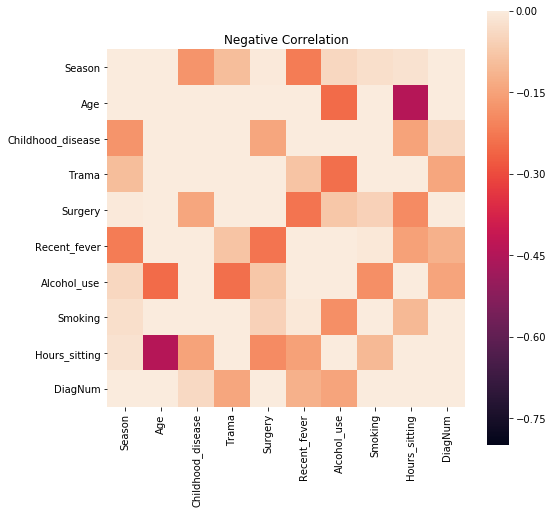

In [49]:
fcorr = features.corr()

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(fcorr, vmax=.8, vmin=-0.0, square=True)
plt.title('Positive Correlation')
plt.show()

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(fcorr, vmax=.0, vmin=-0.8, square=True)
plt.title('Negative Correlation')
plt.show()

I should drop the __Hours_sitting__ and __Smoking__ features since they don't seem to have much correlation with the outcome variable at all. 

## KNN Regression

The first model type I'll try is KNN regression.

In [127]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)

features_knn = ['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever','Alcohol_use']
data_knn = features[features_knn]
target = features.DiagNum
knn.fit(data_knn, target)

print('\nR-squared:',knn.score(data_knn, target))

score_knn = cross_val_score(knn, data_knn, target, cv=10)
print("\nError: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))


R-squared: 0.2234848484848485

Error: -0.05 (+/- 0.52)


I have made a KNN regression where K=5, the accuracy of the model is around 22%. Interestingly, any increase in the number of neighbors drastically reduces the accuraccy of the model.

## OLS Regression

Unlike with KNN regression, OLS regression will well if the features correlate too much with each other. 

In [128]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
features_ols = ['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever','Alcohol_use']
data_ols = features[features_ols]
target = features.DiagNum
regr.fit(data_ols, target)

print('\nCoefficients: \n', regr.coef_)
print('\nR-squared:',regr.score(data_ols, target))

score_ols = cross_val_score(regr, data_ols, target, cv=10)
print("\nError: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))


Coefficients: 
 [ 0.05506585  0.33223146  0.02300592 -0.13651196  0.00350943 -0.06990793
 -0.31166115]

R-squared: 0.10710837044214805

Error: -0.16 (+/- 0.54)


The OLS regression model I made has an accuracy of 11%.

Now it's time to compare my models

## Comparing Models

We can compare the models by looking at there accuracy, represented by their R squared value, and there prediction error, measured by there cross validation scores.

In [130]:
from sklearn.model_selection import cross_val_score

print('\nKNN R-squared:',knn.score(data_knn, target))

print('\nOLS R-squared:',regr.score(data_ols, target))

score_knn = cross_val_score(knn, data_knn, target, cv=10)
print("\nKNN Error: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

score_ols = cross_val_score(regr, data_ols, target, cv=10)
print("\nOLS Error: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))


KNN R-squared: 0.2234848484848485

OLS R-squared: 0.10710837044214805

KNN Error: -0.05 (+/- 0.52)

OLS Error: -0.16 (+/- 0.54)


It seems our data works much better with KNN type regression.  This is probably because the data is small, and there aren't as many data points to training on.  Additionally, none of the provided features has very strong correlation with the outcome, making OLS regression less effective.